In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
def removeColumns(df, file):
    columns_to_keep = ['CITY 1', 'CITY 2',
                       'PASSENGERS TO CITY 2', 'PASSENGERS FROM CITY 2']
    df = df[columns_to_keep]

    df.to_csv(file, index=False)


In [3]:
def dataCleansing(df, file):

    removeColumns(df, file)

    df.replace("-", float("NaN"), inplace=True)
    df.dropna(inplace=True)
    df['PASSENGERS TO CITY 2'] = df['PASSENGERS TO CITY 2'].replace(
        ',', '', regex=True)
    df['PASSENGERS TO CITY 2'] = df['PASSENGERS TO CITY 2'].astype(int)
    df['PASSENGERS FROM CITY 2'] = df['PASSENGERS FROM CITY 2'].replace(
        ',', '', regex=True)
    df['PASSENGERS FROM CITY 2'] = df['PASSENGERS FROM CITY 2'].astype(int)

    avg_passenger = 110
    df['PASSENGERS TO CITY 2'] = (
        df['PASSENGERS TO CITY 2'] // avg_passenger)+1
    df['PASSENGERS FROM CITY 2'] = (
        df['PASSENGERS FROM CITY 2'] // avg_passenger)+1
    df['TOTAL AVG FLIGHTS'] = df['PASSENGERS TO CITY 2'] + \
        df['PASSENGERS FROM CITY 2']
    df = df.rename(columns={'PASSENGERS TO CITY 2': 'AVG FLIGHTS TO CITY 2',
                   'PASSENGERS FROM CITY 2': 'AVG FLIGHTS FROM CITY 2'})
    df.to_csv(file, index=False)


In [4]:
def func1(file, month):
    df = pd.read_csv(file)

    # dataCleansing(df, file)

    column_max = df['TOTAL AVG FLIGHTS'].max()
    max_row = df[df['TOTAL AVG FLIGHTS'] == column_max]
    print(f"Busiest route in {month}:")
    print(max_row[['CITY 1', 'CITY 2', 'TOTAL AVG FLIGHTS']])

    # finding total arriving flights in a particular city
    arrival = {}
    with open(file, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        count = 0
        for row in csvreader:
            #         removing 1st line
            if not count:
                count += 1
                continue
            #     for city1
            if row[1] not in arrival:
                arrival[row[1]] = int(row[4])
            else:
                arrival[row[1]] += int(row[4])
        #     for city2
            if row[2] not in arrival:
                arrival[row[2]] = int(row[3])
            else:
                arrival[row[2]] += int(row[3])
    # print(arrival)

    # finding total departuring flights from a particular city
    departure = {}
    with open(file, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        count = 0
        for row in csvreader:
            #         removing 1st line
            if not count:
                count += 1
                continue
            #     for city1
            if row[1] not in departure:
                departure[row[1]] = int(row[3])
            else:
                departure[row[1]] += int(row[3])
        #     for city2
            if row[2] not in departure:
                departure[row[2]] = int(row[4])
            else:
                departure[row[2]] += int(row[4])
    # print(departure)

    cities = list(arrival.keys())
    total_traffic = np.array(list(arrival.values())) + \
        np.array(list(departure.values()))
    # print(cities)
    # print(total_traffic)

    major_cities_traffic = sorted(
        enumerate(total_traffic), key=lambda x: x[1], reverse=True)[:7]
    # print(major_cities_traffic)
    index = []
    temp = []
    for i, value in major_cities_traffic:
        index.append(i)
        temp.append(value)
    major_cities_traffic = temp
    # print(index)
    sum = 0
    for i in range(len(total_traffic)):
        if i not in index:
            sum += total_traffic[i]

    major_cities_traffic.append(sum)
    # print(major_cities_traffic)
    major_cities = [cities[i] for i in index]
    major_cities.append('Other Cities')
    # print(major_cities)

    # Citywise Traffic piechart
    plt.figure(figsize=(15, 15))
    wedges, labels, x = plt.pie(
        major_cities_traffic, labels=major_cities, autopct='%1.2f%%',textprops={'fontsize': 13})

    for label in labels:
        label.set_fontsize(15)

    plt.title(f"City-wise Traffic ({month})")
    plt.show()

    new_major_cities = [major_cities[x] for x in range(len(major_cities)-1)]
    plt.figure(figsize=(10, 10))
    # Citywise arrival piechart
    new_arrival = [arrival[x] for x in new_major_cities]
    plt1 = plt.subplot(1, 2, 1)
    plt.pie(new_arrival, labels=new_major_cities, autopct='%1.2f%%')
    plt.title(f"City-wise Arrival in major cities ({month})")

    # Citywise departure piechart
    new_departure = [departure[x] for x in new_major_cities]
    plt2 = plt.subplot(1, 2, 2)
    plt.pie(new_departure, labels=new_major_cities, autopct='%1.2f%%')
    plt.title(f"City-wise Departure in major cities ({month})")
    plt.show()

    df.to_csv(file, index=False)
    # df.head()


Busiest route in January 2022:
          CITY 1         CITY 2  TOTAL AVG FLIGHTS
0       AGARTALA      AHMEDABAD                  2
1       AGARTALA         AIZAWL                  2
2       AGARTALA      BENGALURU                  2
3       AGARTALA          DELHI                  2
4       AGARTALA      DIBRUGARH                  2
..           ...            ...                ...
529  RAJAHMUNDRY  VISAKHAPATNAM                  2
530     SHILLONG        SILCHAR                  2
531     TIRUPATI     VIJAYAWADA                  2
532     TIRUPATI  VISAKHAPATNAM                  2
533   VIJAYAWADA  VISAKHAPATNAM                  2

[534 rows x 3 columns]


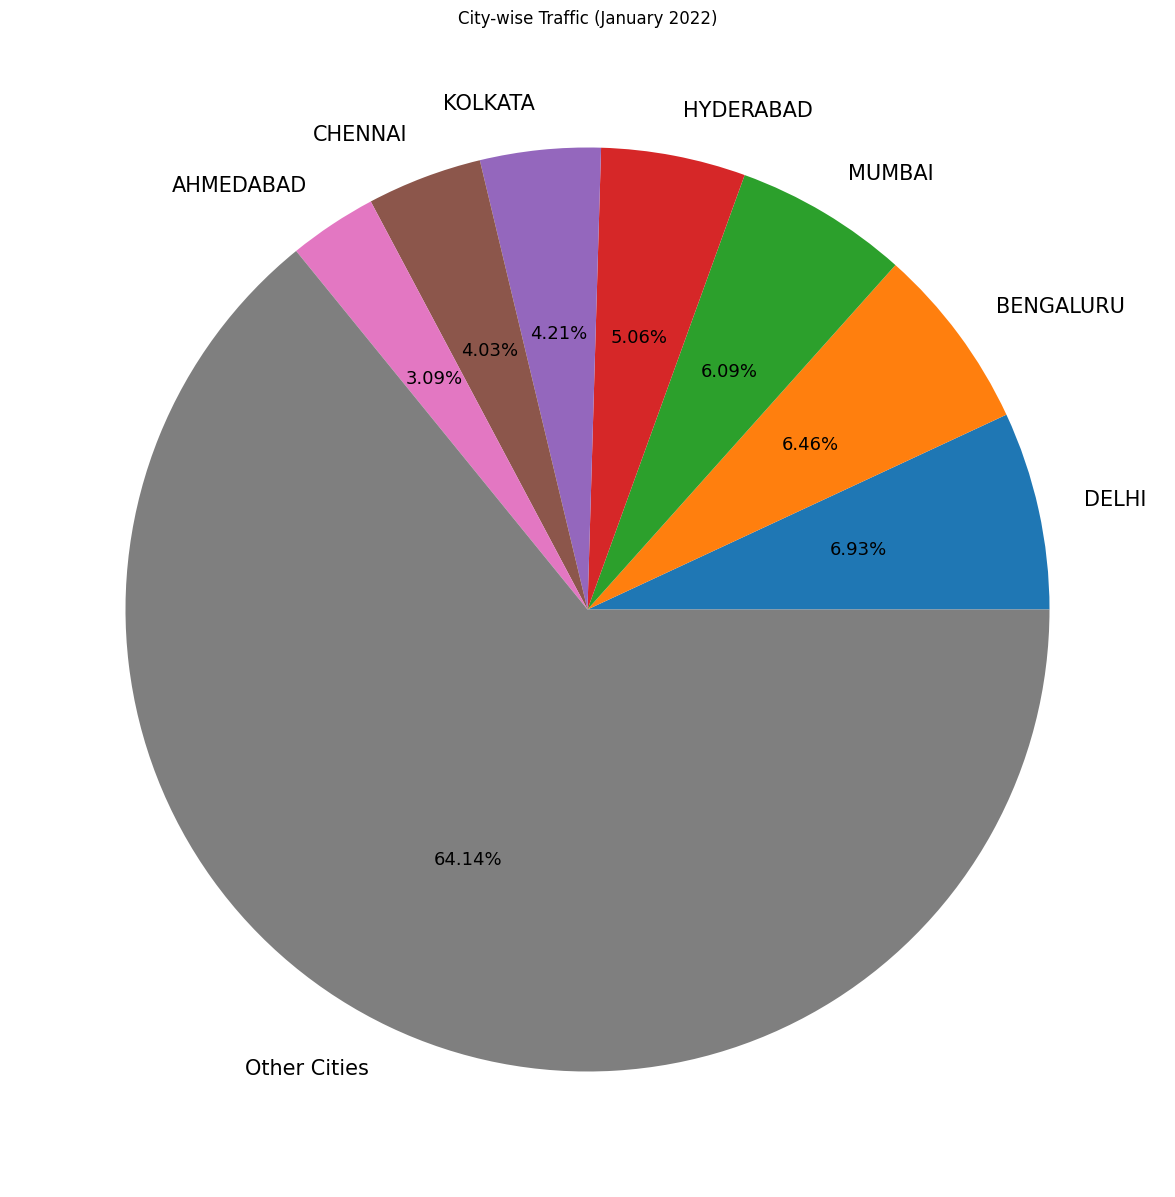

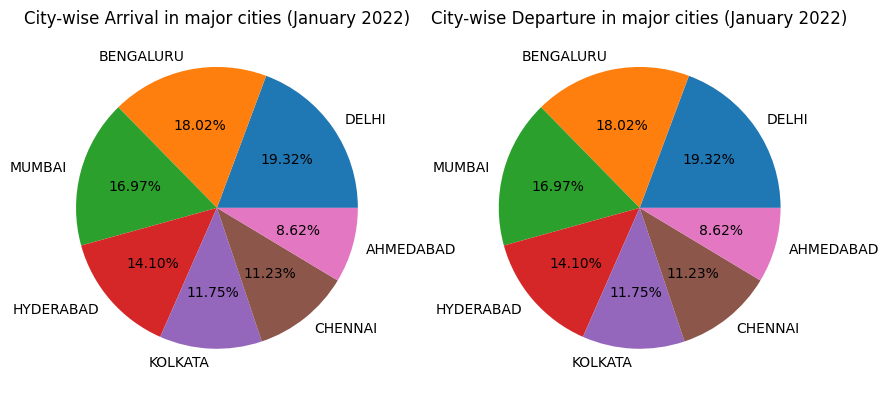

In [5]:
func1('january2022.csv','January 2022')

Busiest route in February 2022:
    CITY 1  CITY 2  TOTAL AVG FLIGHTS
277  DELHI  MUMBAI                 28


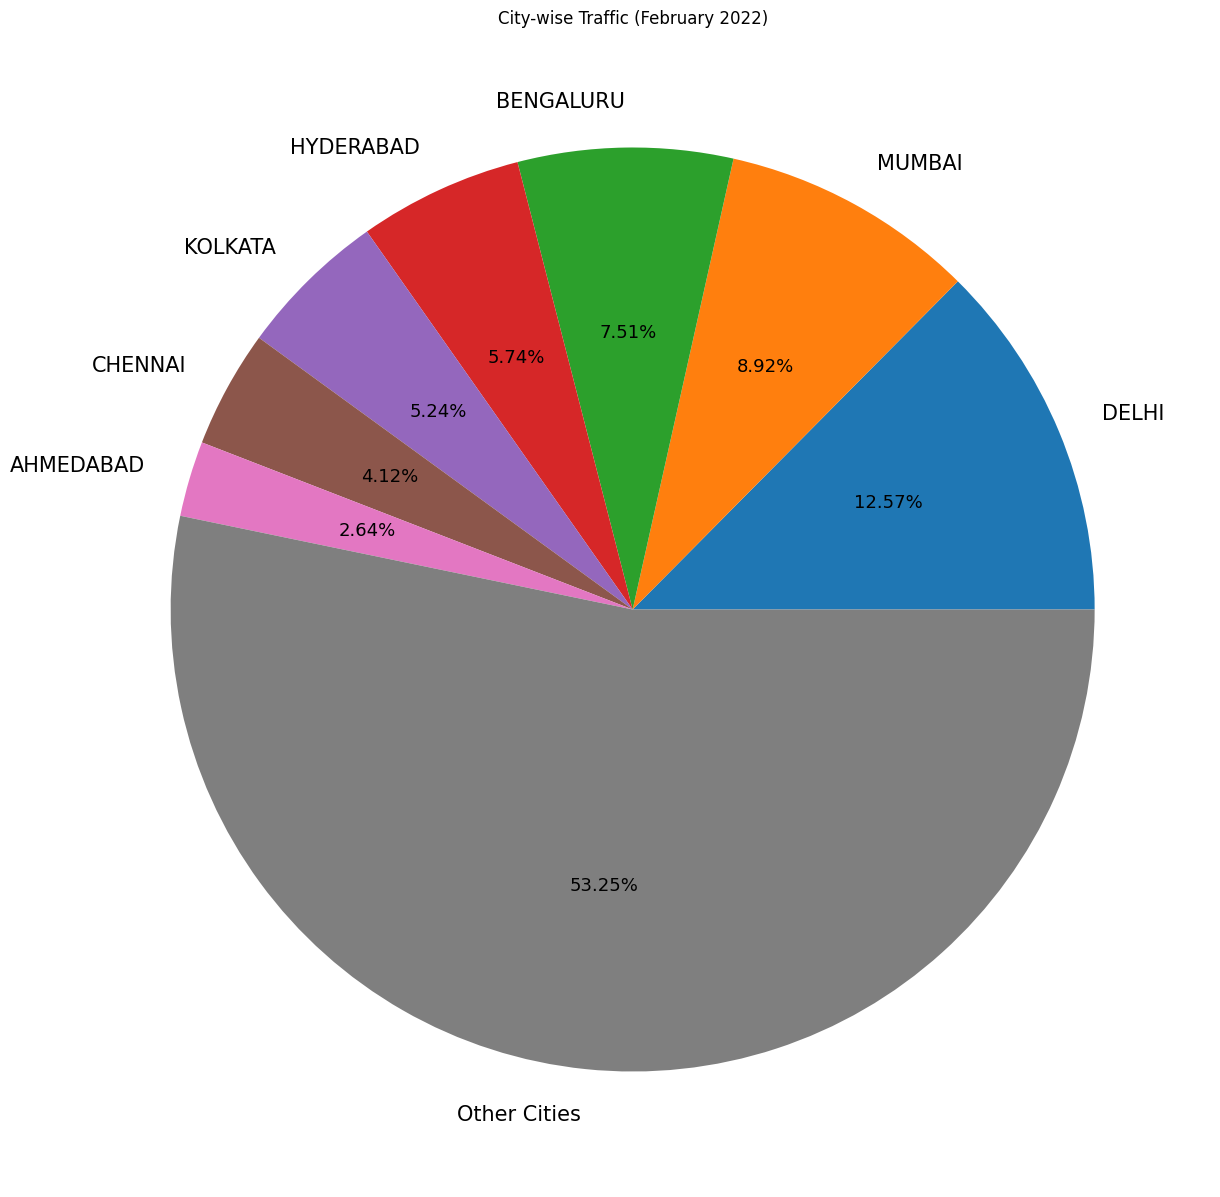

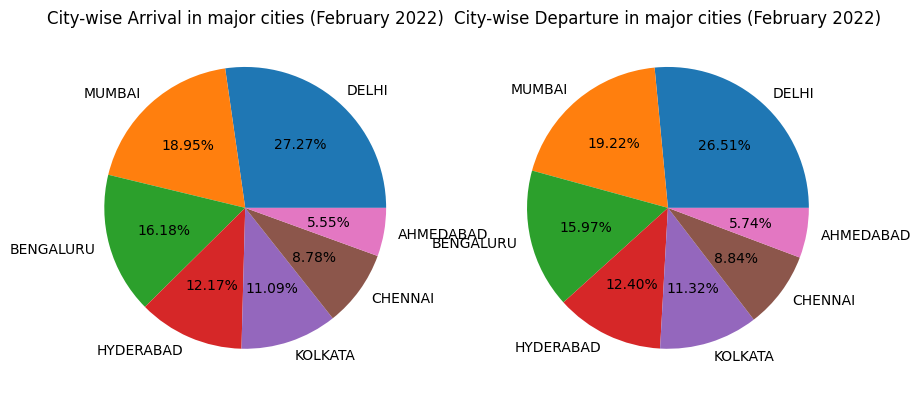

In [6]:
func1('feb2022.csv','February 2022')

Busiest route in March 2022:
    CITY 1  CITY 2  TOTAL AVG FLIGHTS
316  DELHI  MUMBAI                 38


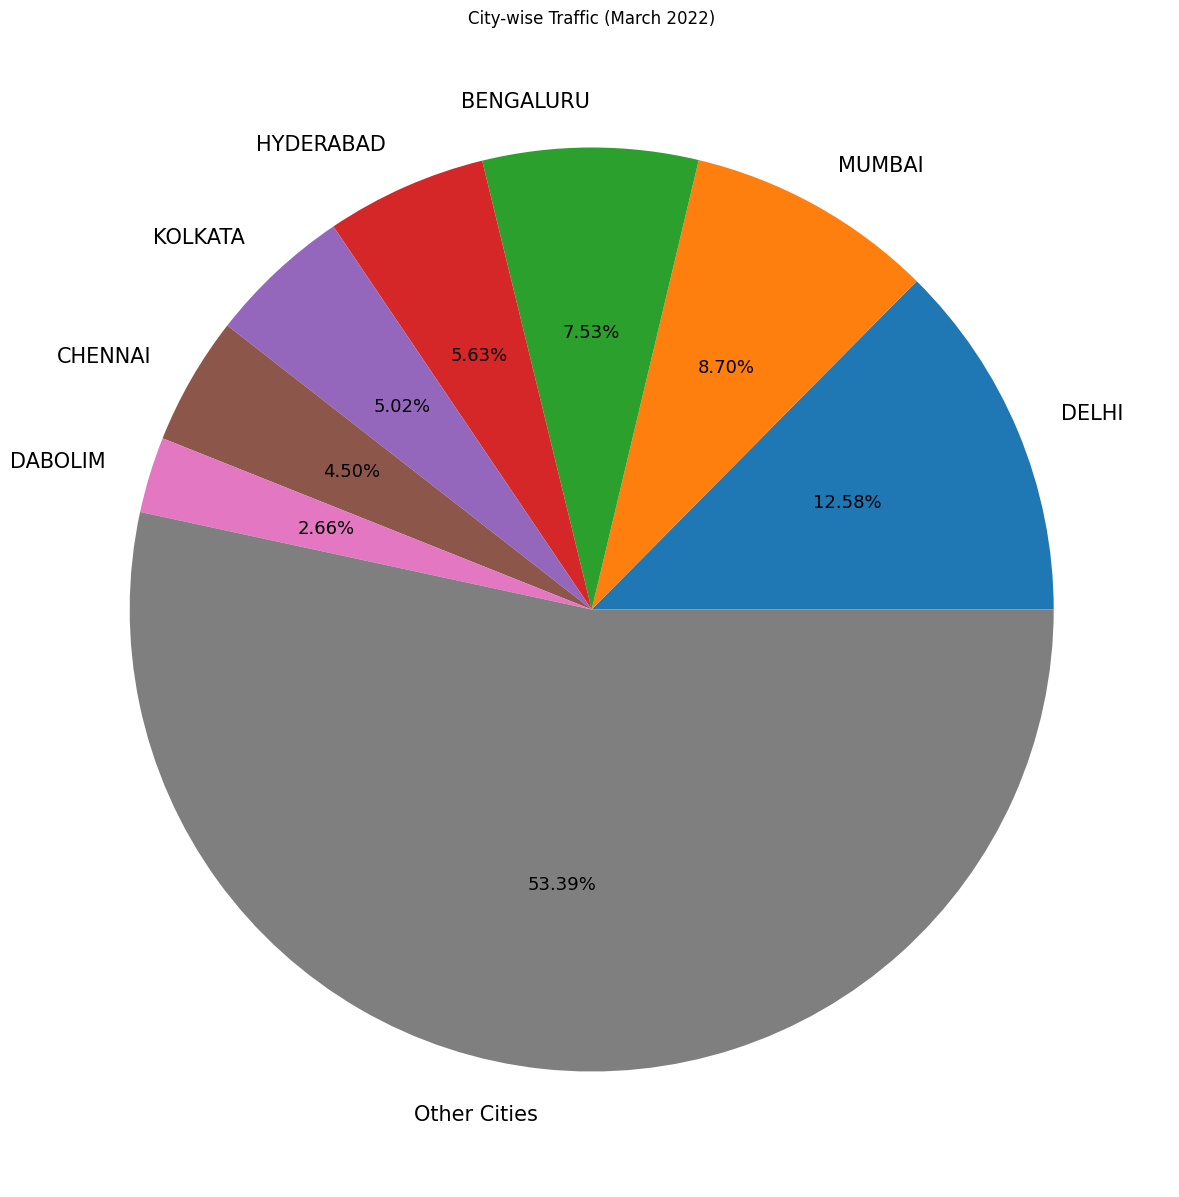

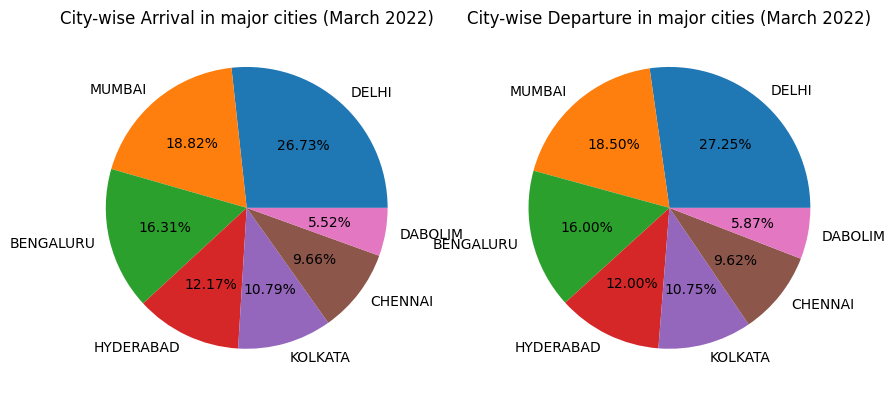

In [7]:
func1('march2022.csv','March 2022')

Busiest route in April 2022:
    CITY 1  CITY 2  TOTAL AVG FLIGHTS
312  DELHI  MUMBAI                 37


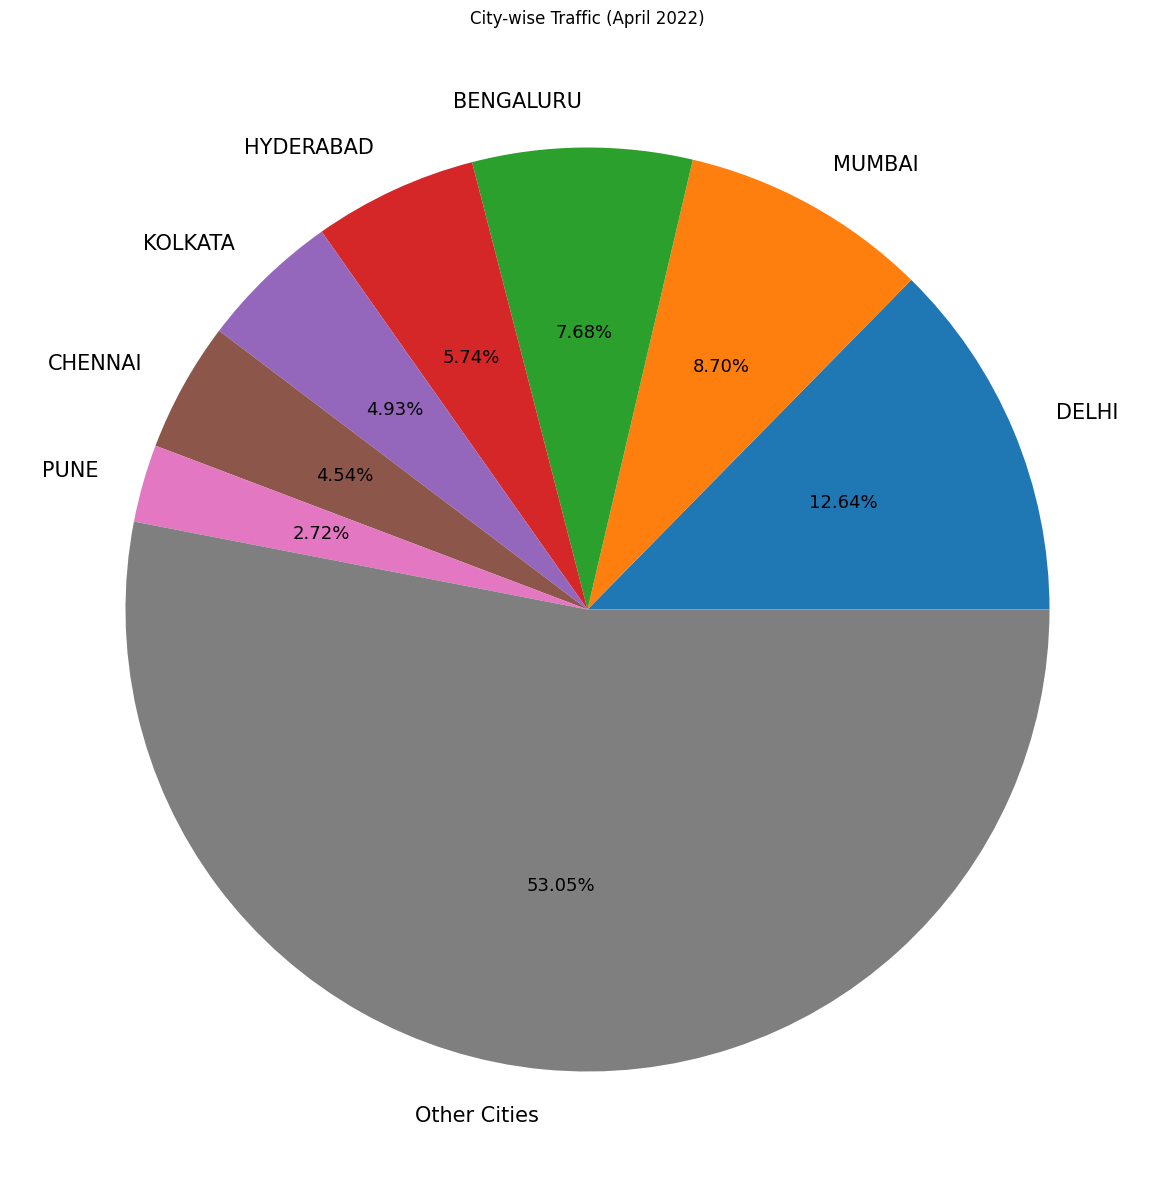

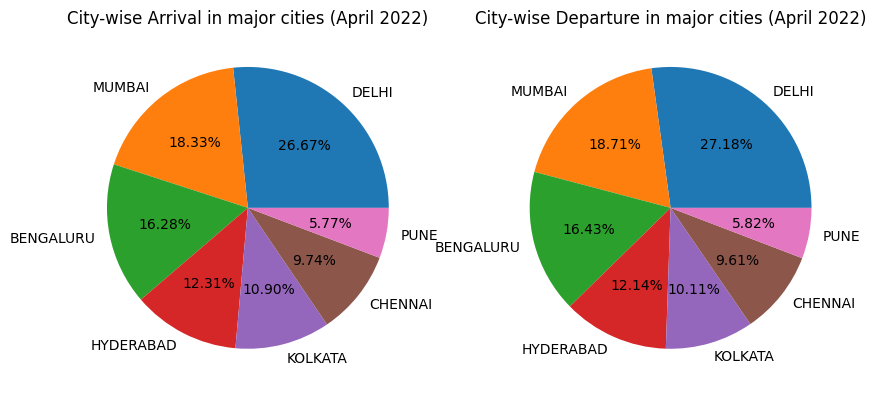

In [8]:
func1('april2022.csv','April 2022')

Busiest route in May 2022:
    CITY 1  CITY 2  TOTAL AVG FLIGHTS
316  DELHI  MUMBAI                 44


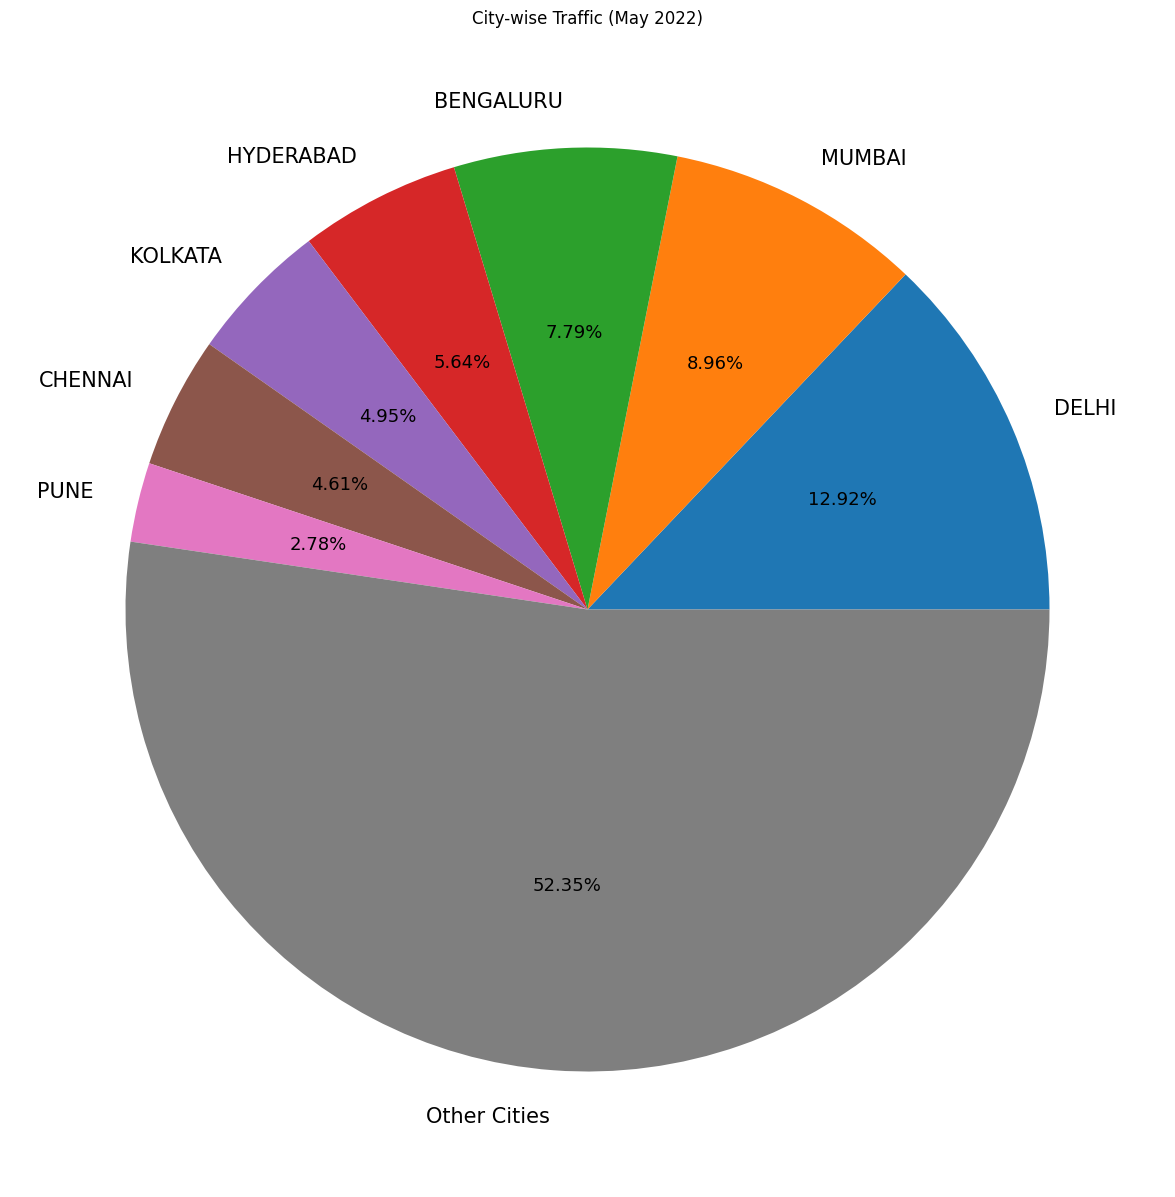

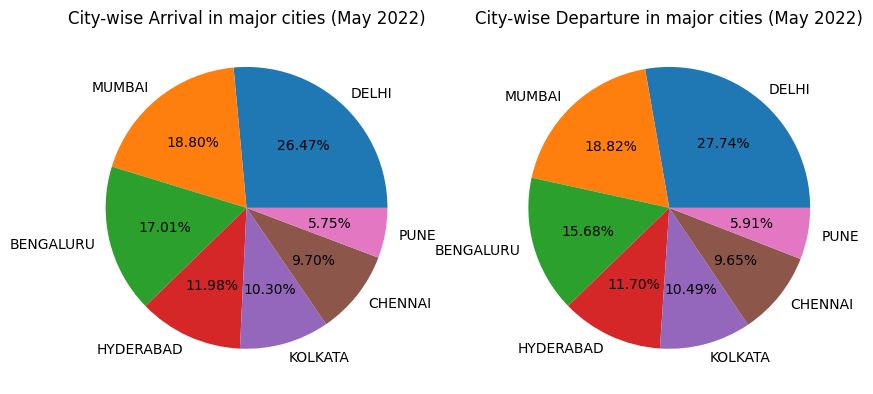

In [9]:
func1('may2022.csv','May 2022')

Busiest route in June 2022:
    CITY 1  CITY 2  TOTAL AVG FLIGHTS
328  DELHI  MUMBAI                 35


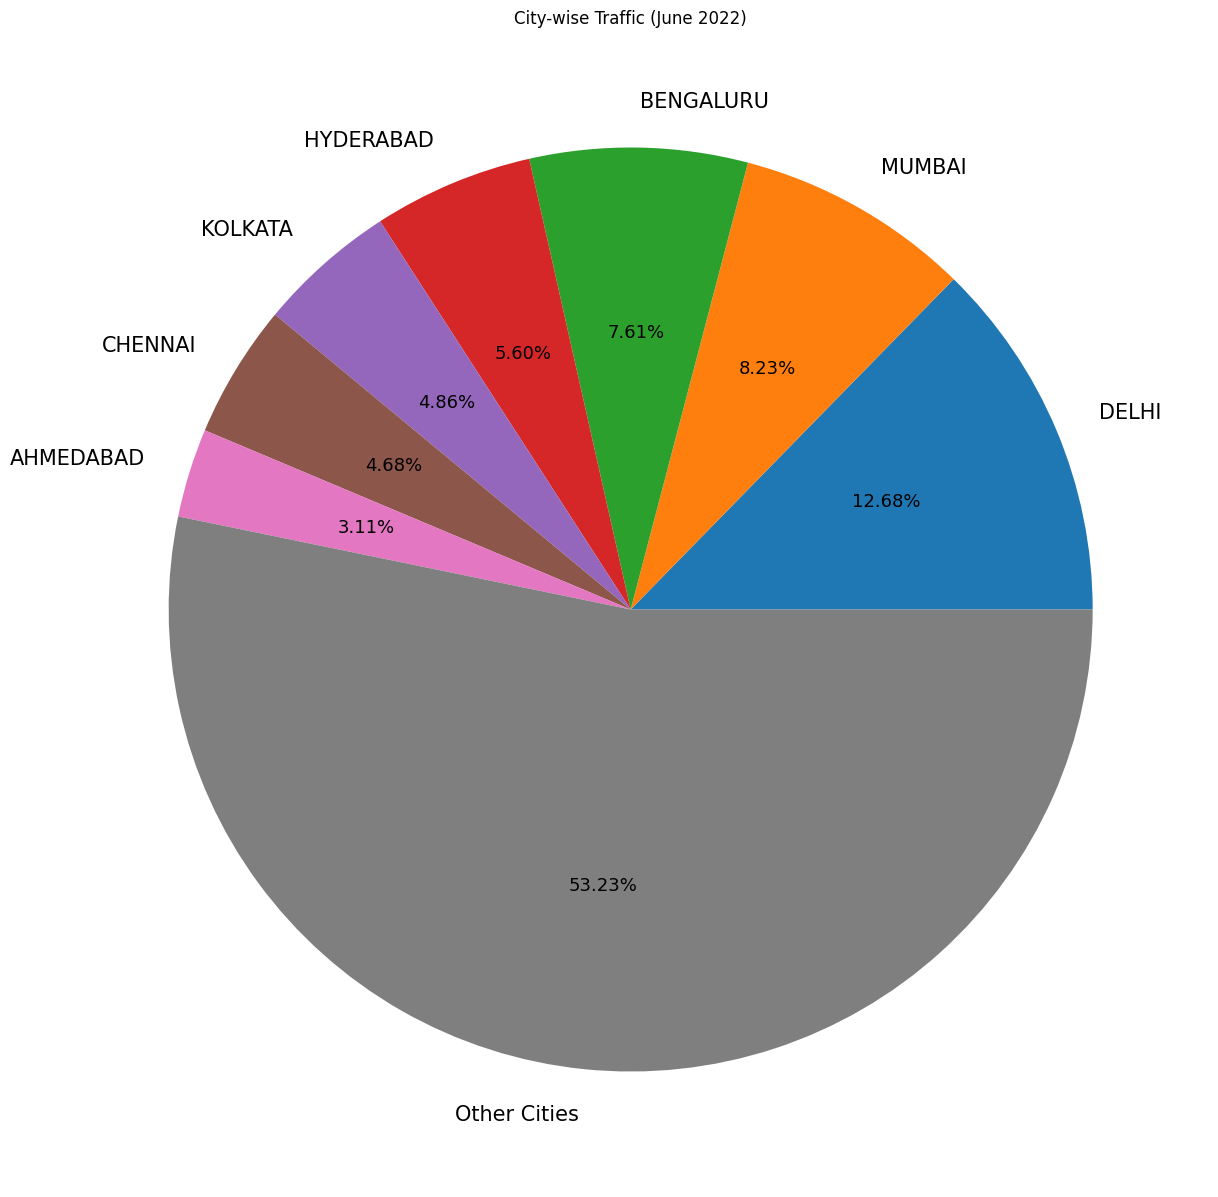

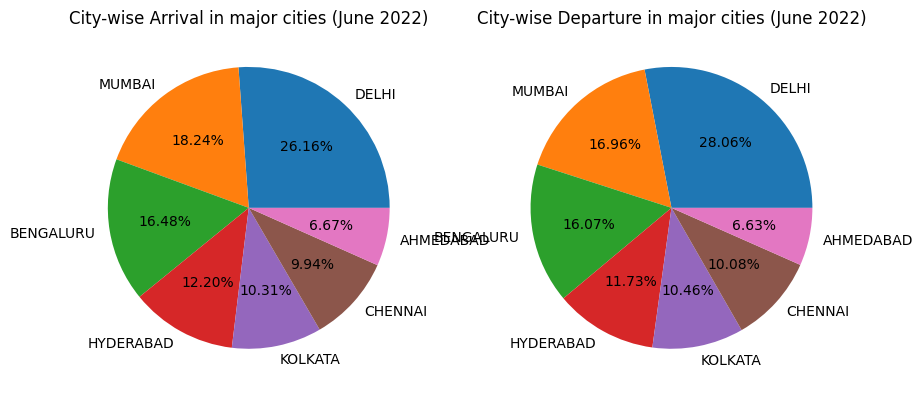

In [10]:
func1('june2022.csv','June 2022')

Busiest route in July 2022:
    CITY 1  CITY 2  TOTAL AVG FLIGHTS
253  DELHI  MUMBAI                 32


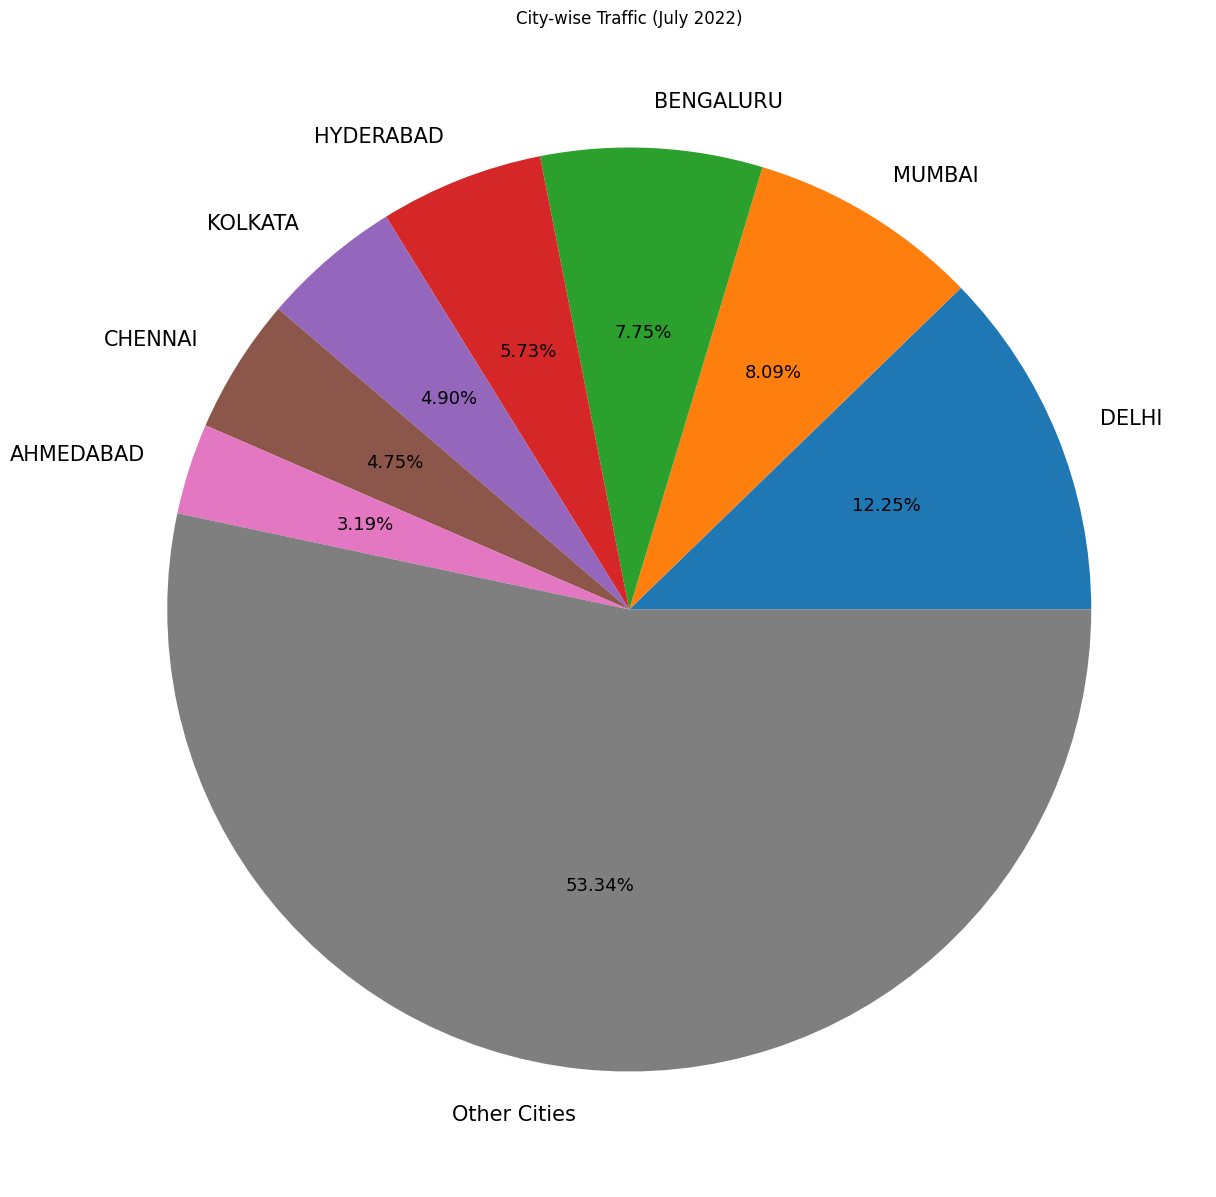

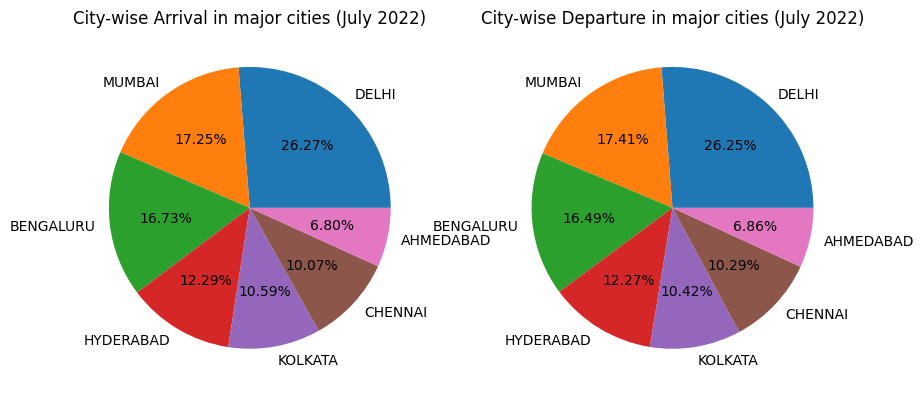

In [11]:
func1('july2022.csv','July 2022')

Busiest route in August 2022:
    CITY 1  CITY 2  TOTAL AVG FLIGHTS
249  DELHI  MUMBAI                 35


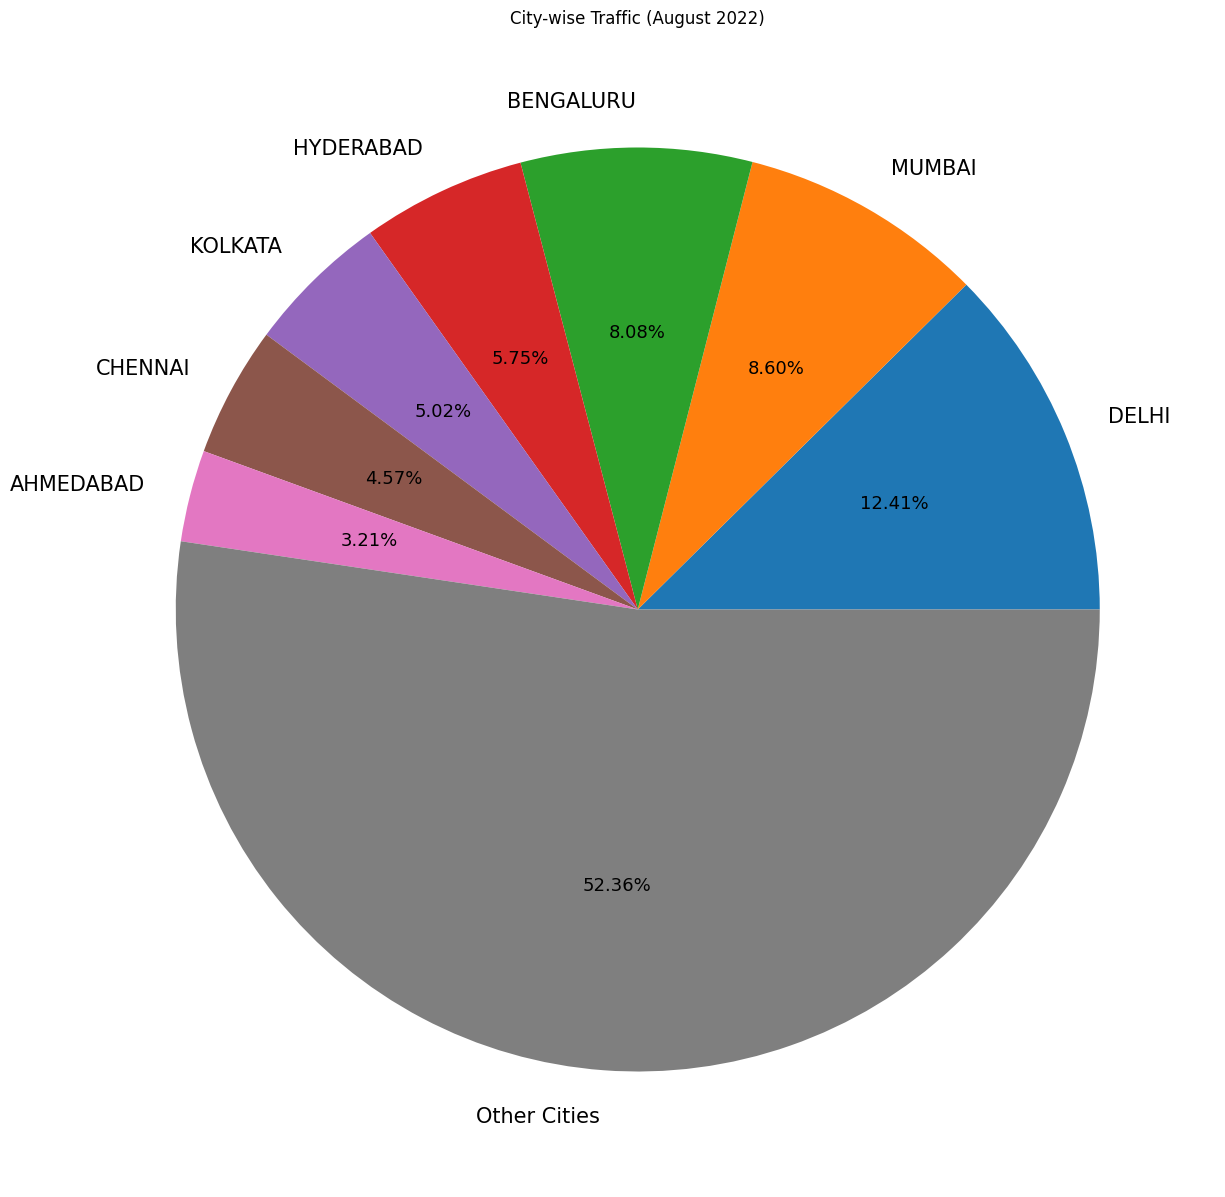

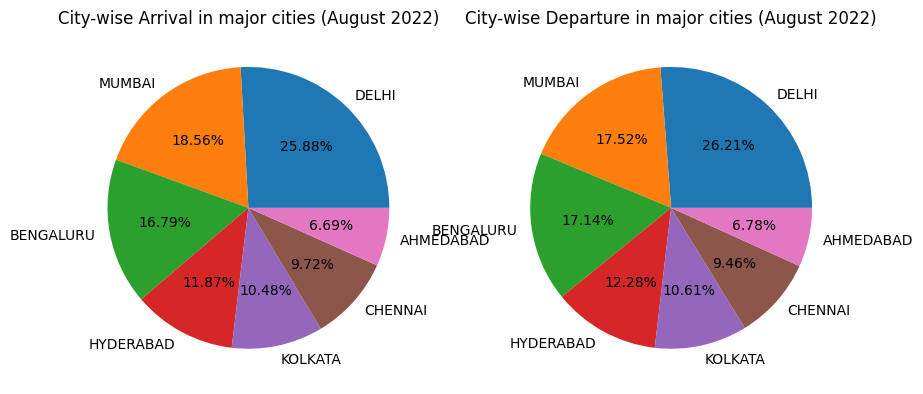

In [12]:
func1('august2022.csv','August 2022')

Busiest route in September 2022:
    CITY 1  CITY 2  TOTAL AVG FLIGHTS
246  DELHI  MUMBAI                 37


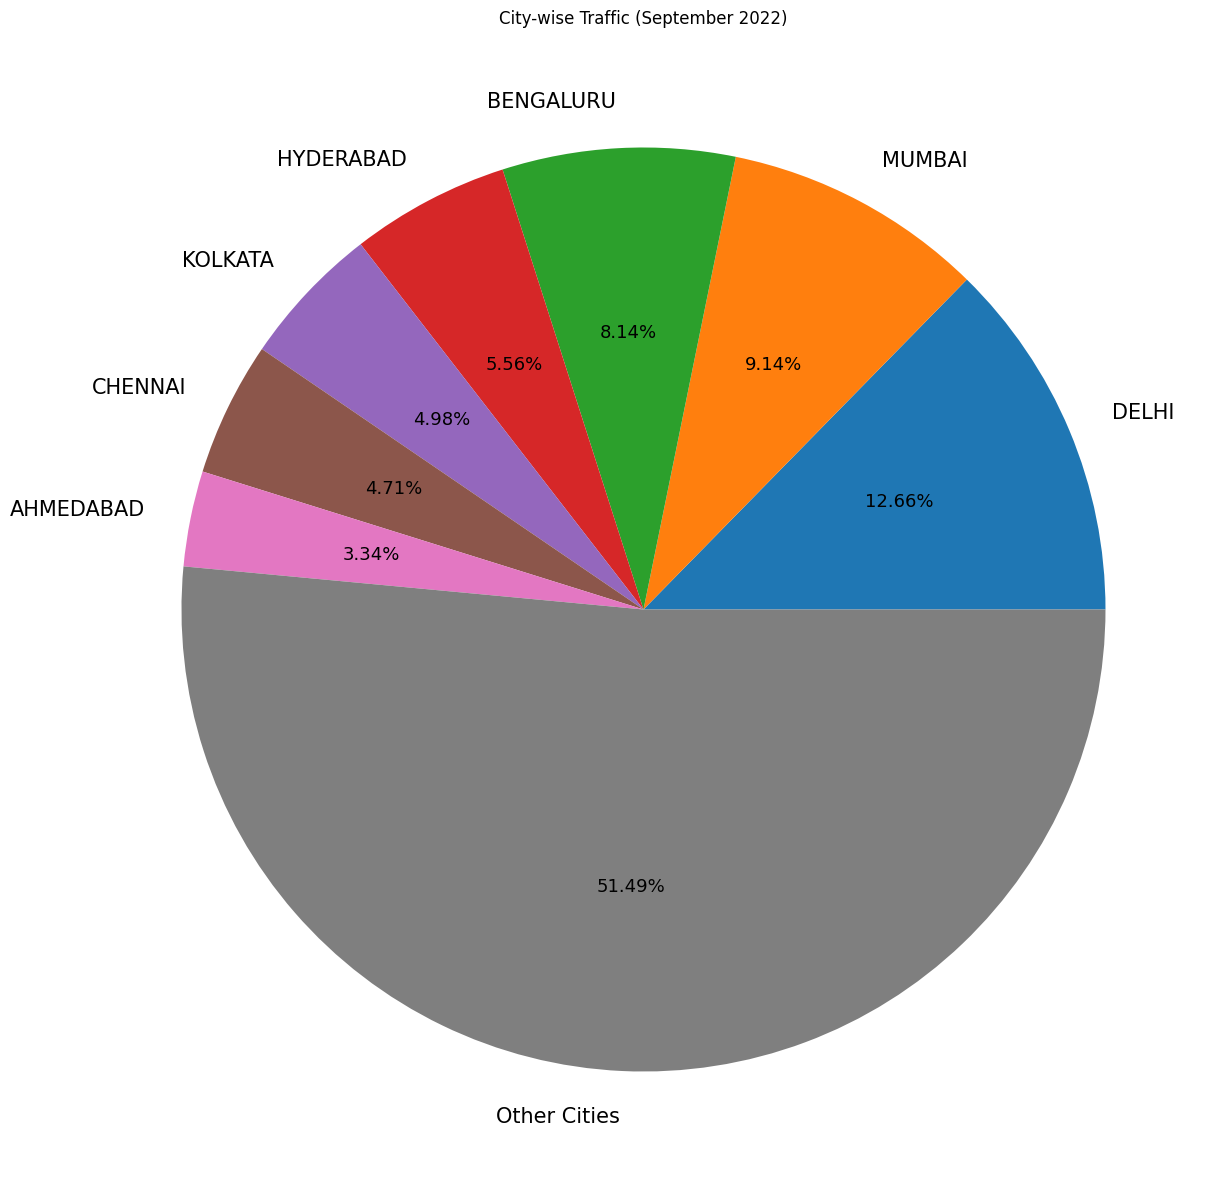

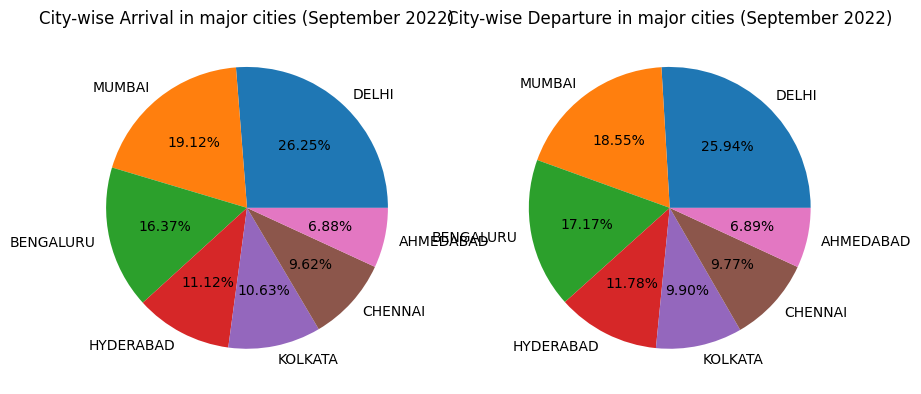

In [13]:
func1('september2022.csv','September 2022')

Busiest route in October 2022:
    CITY 1  CITY 2  TOTAL AVG FLIGHTS
254  DELHI  MUMBAI                 39


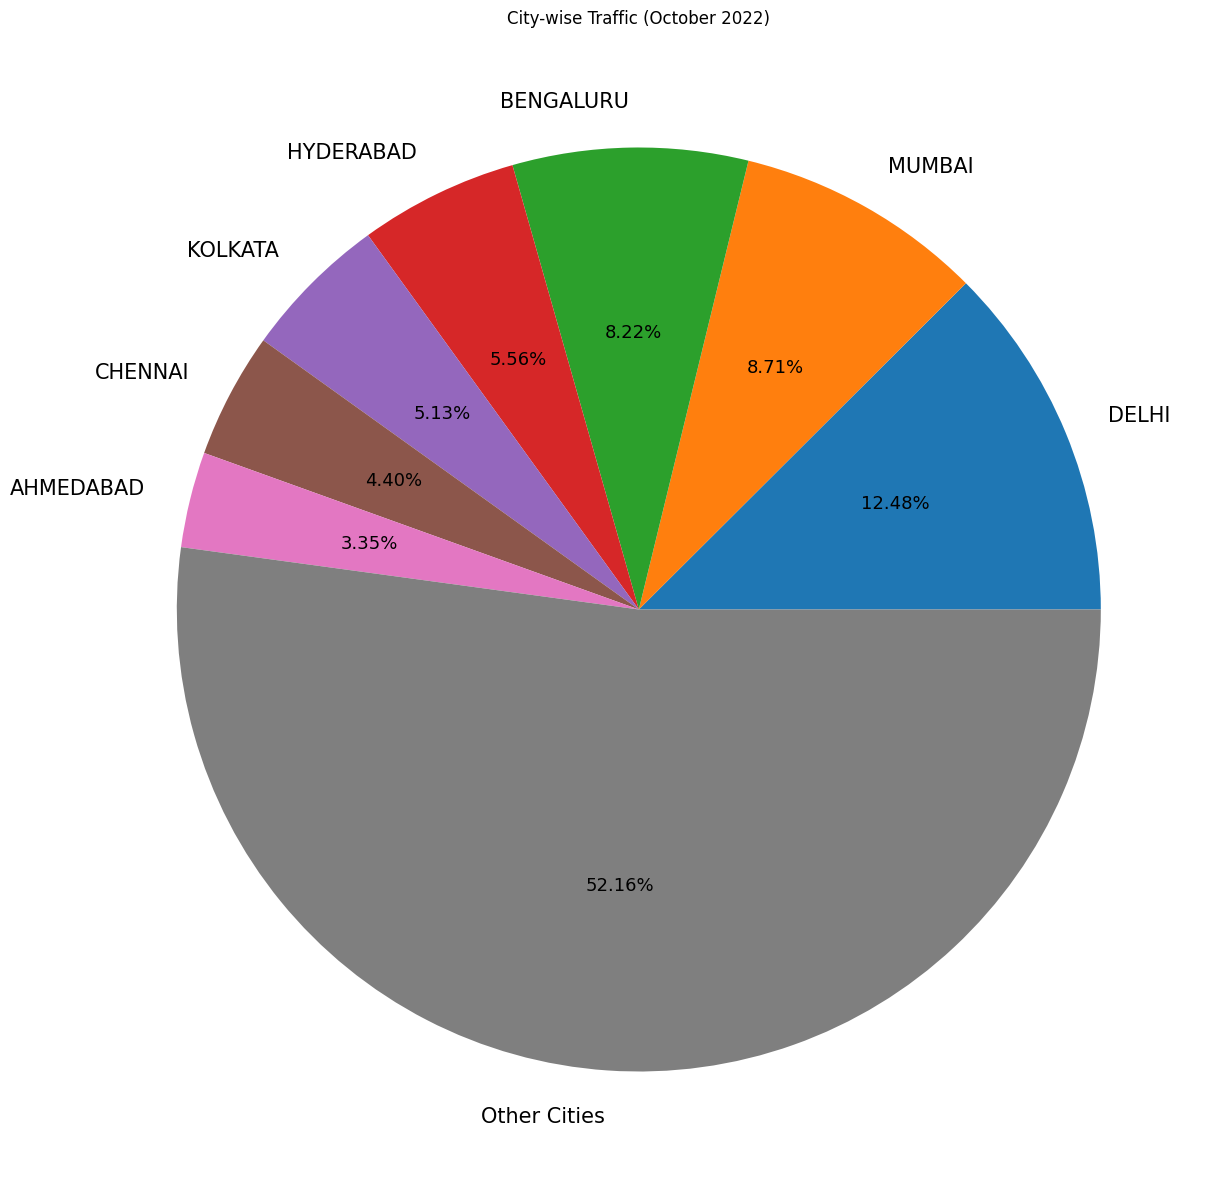

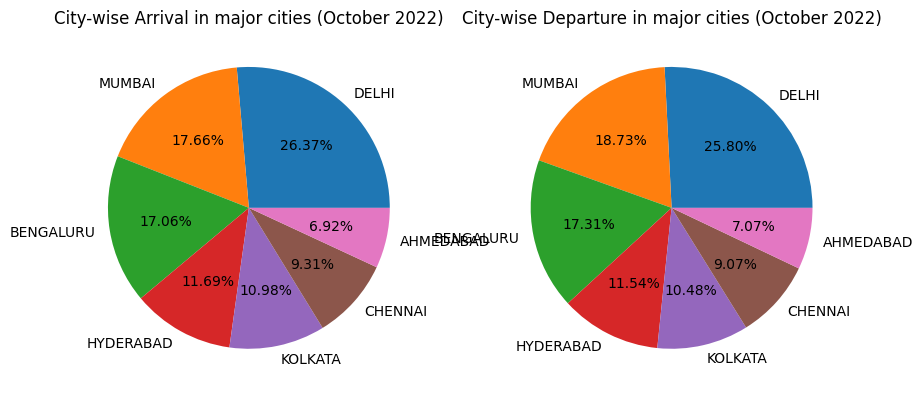

In [14]:
func1('october2022.csv','October 2022')

Busiest route in November 2022:
    CITY 1  CITY 2  TOTAL AVG FLIGHTS
319  DELHI  MUMBAI                 42


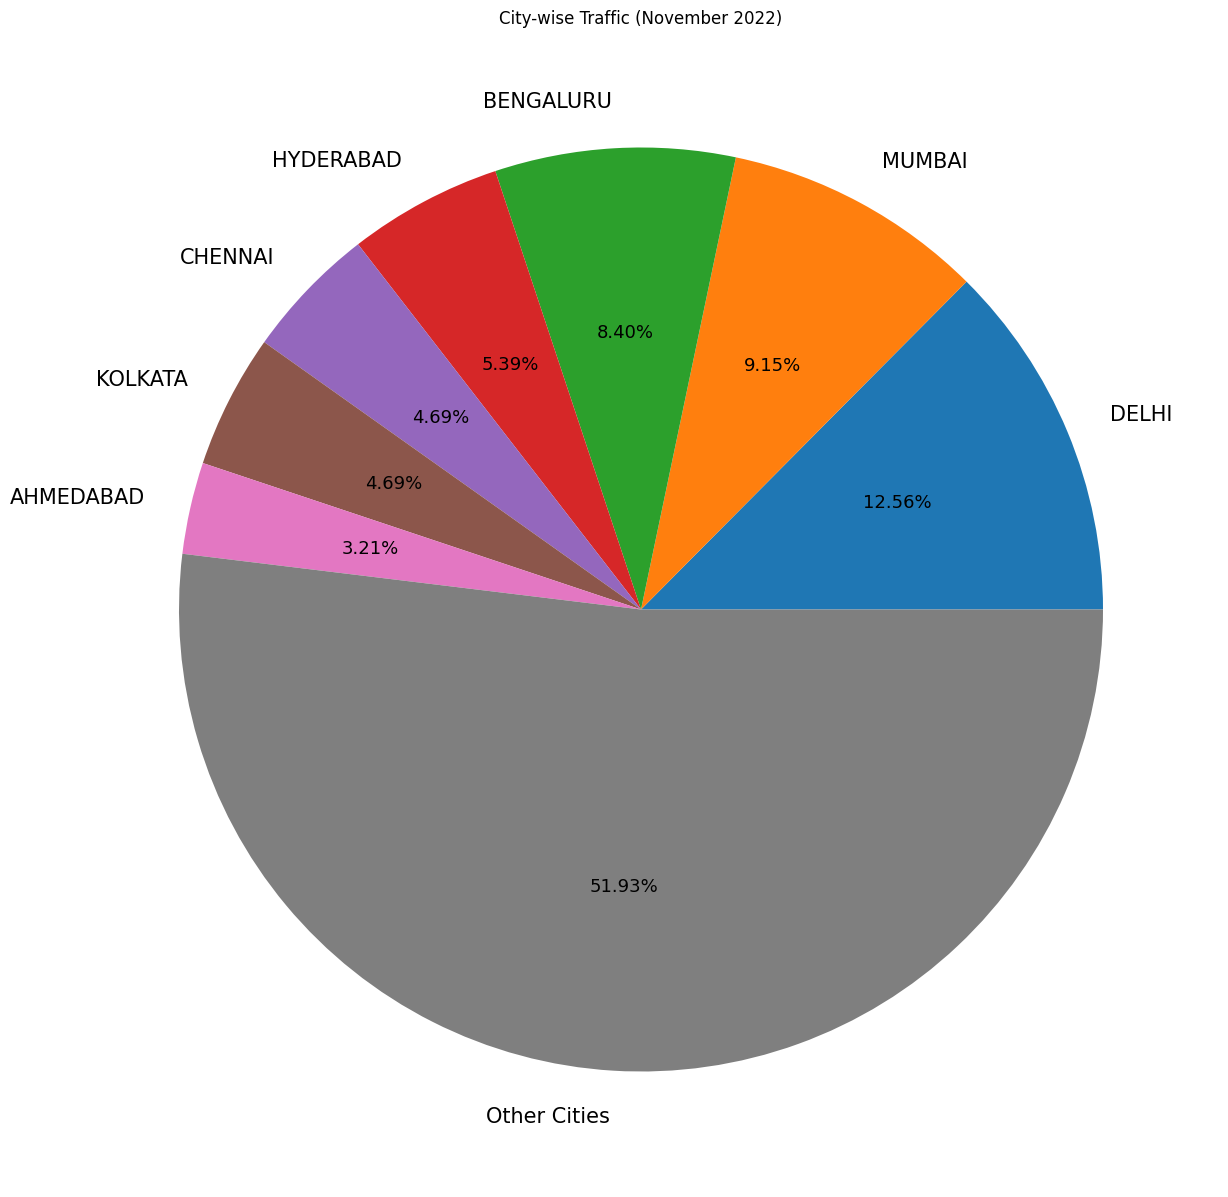

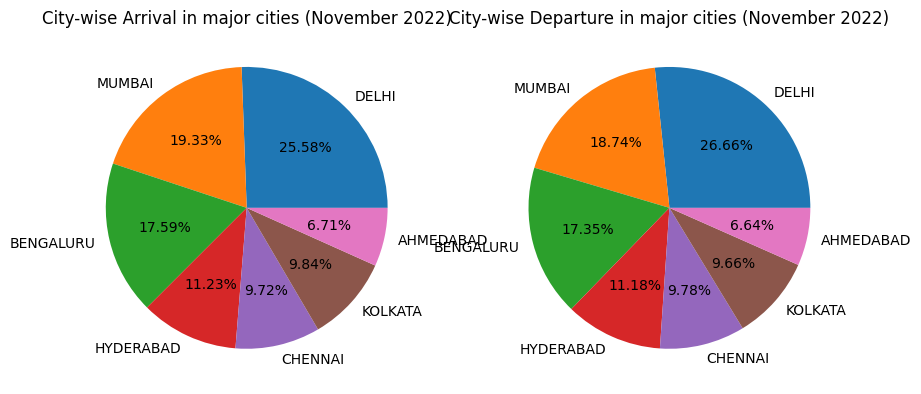

In [15]:
func1('november2022.csv','November 2022')

Busiest route in December 2022:
    CITY 1  CITY 2  TOTAL AVG FLIGHTS
314  DELHI  MUMBAI                 45


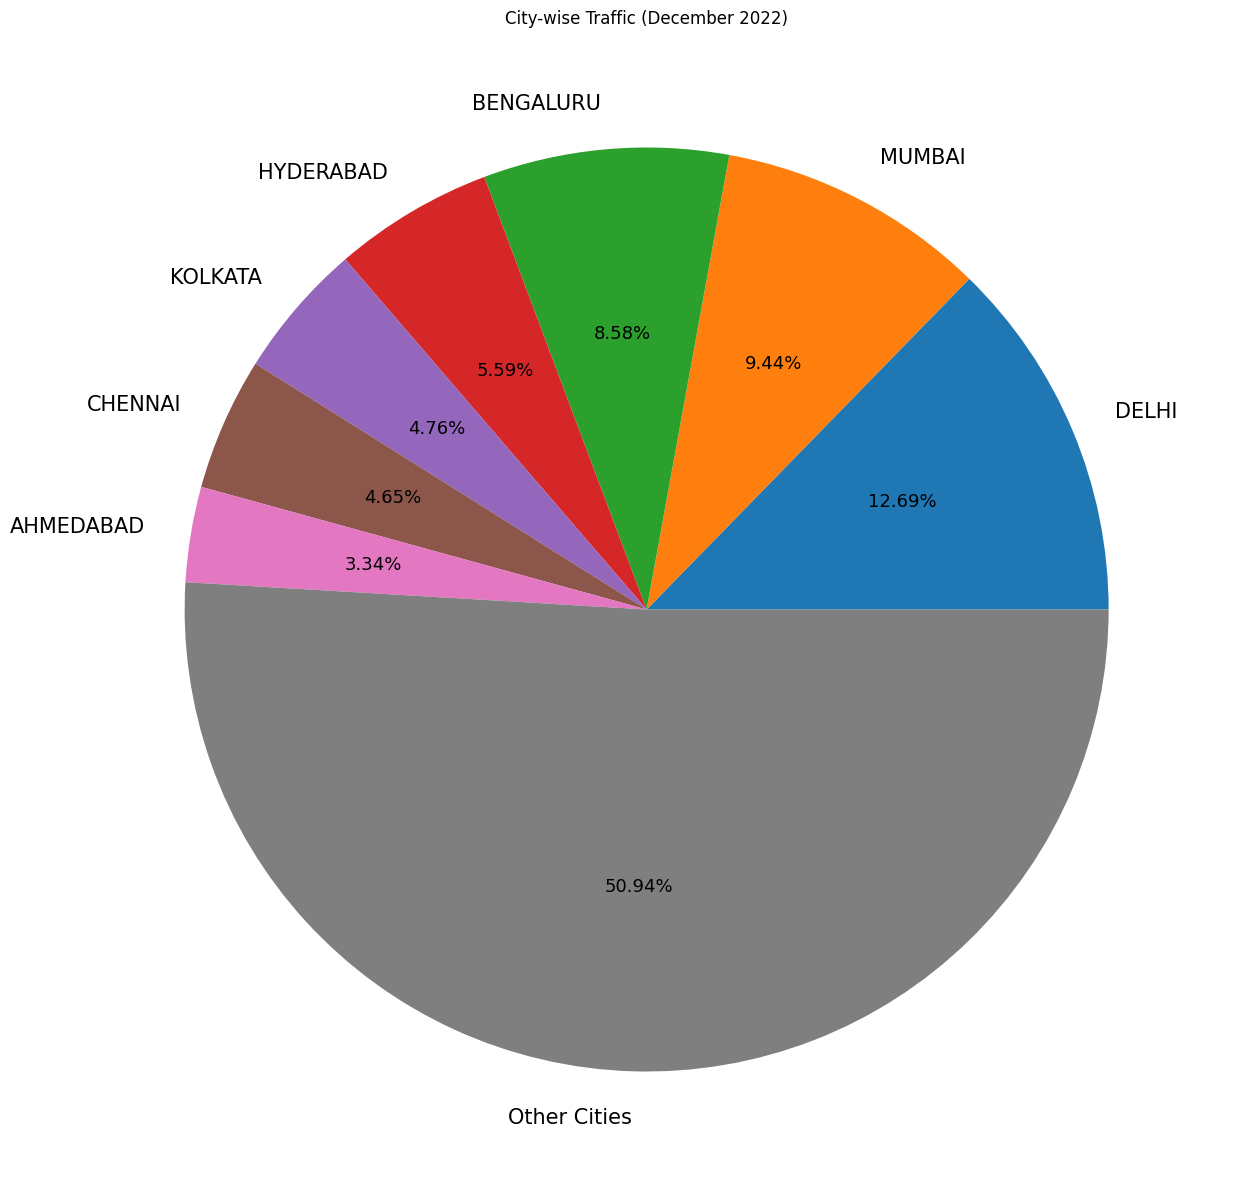

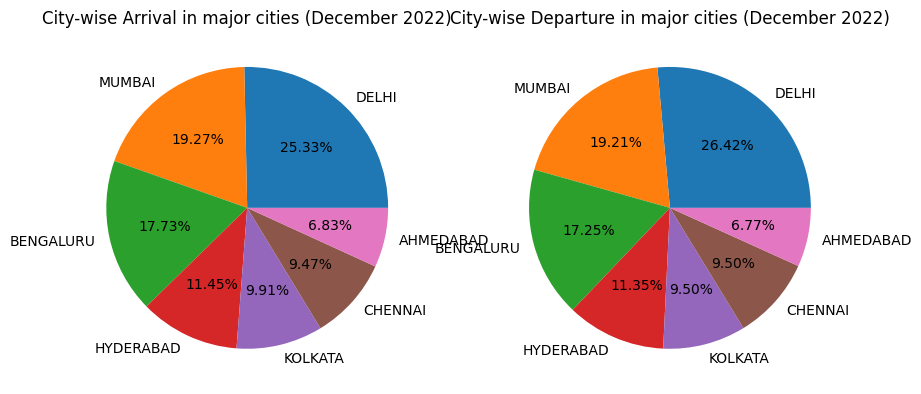

In [16]:
func1('december2022.csv','December 2022')